In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import multianndata as mad
import cna
import scanpy as sc
from matplotlib import pyplot as plt

from plotnine import *

In [2]:
# parameters
resolution = "major_cell_types"
analysis_name = "no_expr_pc_covars"
celltype = "Unconventional_T"

In [3]:
# read in the multi anndata with GeNA phenotype information
madata = cna.read(
    f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/multianndata/{resolution}/{analysis_name}/{celltype}_scDataObject.dimreduc.pca.gena_pheno.h5ad"
)


Only considering the two last: ['.gena_pheno', '.h5ad'].
Only considering the two last: ['.gena_pheno', '.h5ad'].


Import umap and cell function scores from Lawrence's analysis

In [4]:
madata.obs

,id,sequencing_library,cohort,wg2_scpred_prediction,npheno_1:143272081:G:C,npheno_3:15163210:T:TC,npheno_12:121634284:G:T,npheno_12:123389131:T:TGGCGGCGGCAGCAGCAGCAGCAGCGGCAGCGGCAGCGGTGGTGGCCGGGCCGCGGCGGC,npheno_13:45380398:T:TG,npheno_13:112149033:C:CCCTGTGGAAGCCCTGACTCCCAGTGTGATAGTACCTGTGGAAACCCTGACCCCTGTGTGATGGTA,npheno_5:137537935:A:AC
AAAGTCCTCTACCTTA_S0056a,CPG248708,S0056a,BioHEART,gdT,-0.057846,-0.007171,-0.028040,-0.010077,0.016838,0.018895,0.052083
AAAGTGAAGCAATTCC_S0056a,CPG247833,S0056a,BioHEART,MAIT,0.022805,-0.058404,0.030987,-0.028449,-0.033572,0.002096,-0.017897
AACAACCAGACAGTCG_S0056a,CPG248534,S0056a,BioHEART,gdT,-0.018193,-0.025657,-0.053826,0.002019,-0.002931,-0.004590,0.033959
AACAAGACACACGGAA_S0056a,CPG248708,S0056a,BioHEART,dnT,-0.029004,0.020335,-0.005279,0.030278,0.008259,0.021055,-0.011515
AACACACGTGCTCTCT_S0056a,CPG247833,S0056a,BioHEART,MAIT,0.058374,-0.058493,0.049327,-0.059575,-0.056250,-0.036351,-0.039890
...,...,...,...,...,...,...,...,...,...,...,...
TTTCGATCATCGGATT_S0176,CPG500082,S0176,BioHEART,MAIT,-0.046867,0.059438,-0.042842,0.044647,0.047564,0.069362,0.104673
TTTGACTAGGGCATGT_S0176,CPG500348,S0176,BioHEART,MAIT,-0.017000,0.004779,-0.013815,-0.007715,-0.003251,0.035268,0.027895
TTTGATCCATGCTGCG_S0176,CPG500249,S0176,BioHEART,MAIT,-0.138766,0.107906,-0.104373,0.120056,0.120214,0.106819,0.083103
TTTGGAGCACGCGCAT_S0176,CPG500249,S0176,BioHEART,gdT,0.058858,-0.036765,0.039519,-0.030834,-0.043800,-0.081193,-0.076633


/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


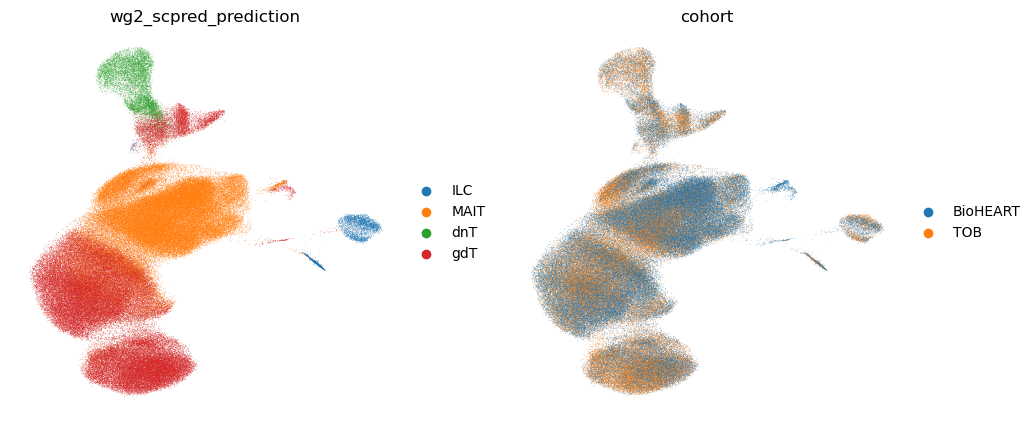

In [6]:
# umap plots
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        madata,
        color=["wg2_scpred_prediction", "cohort"],
        frameon=False,
        ncols=4,
    )

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


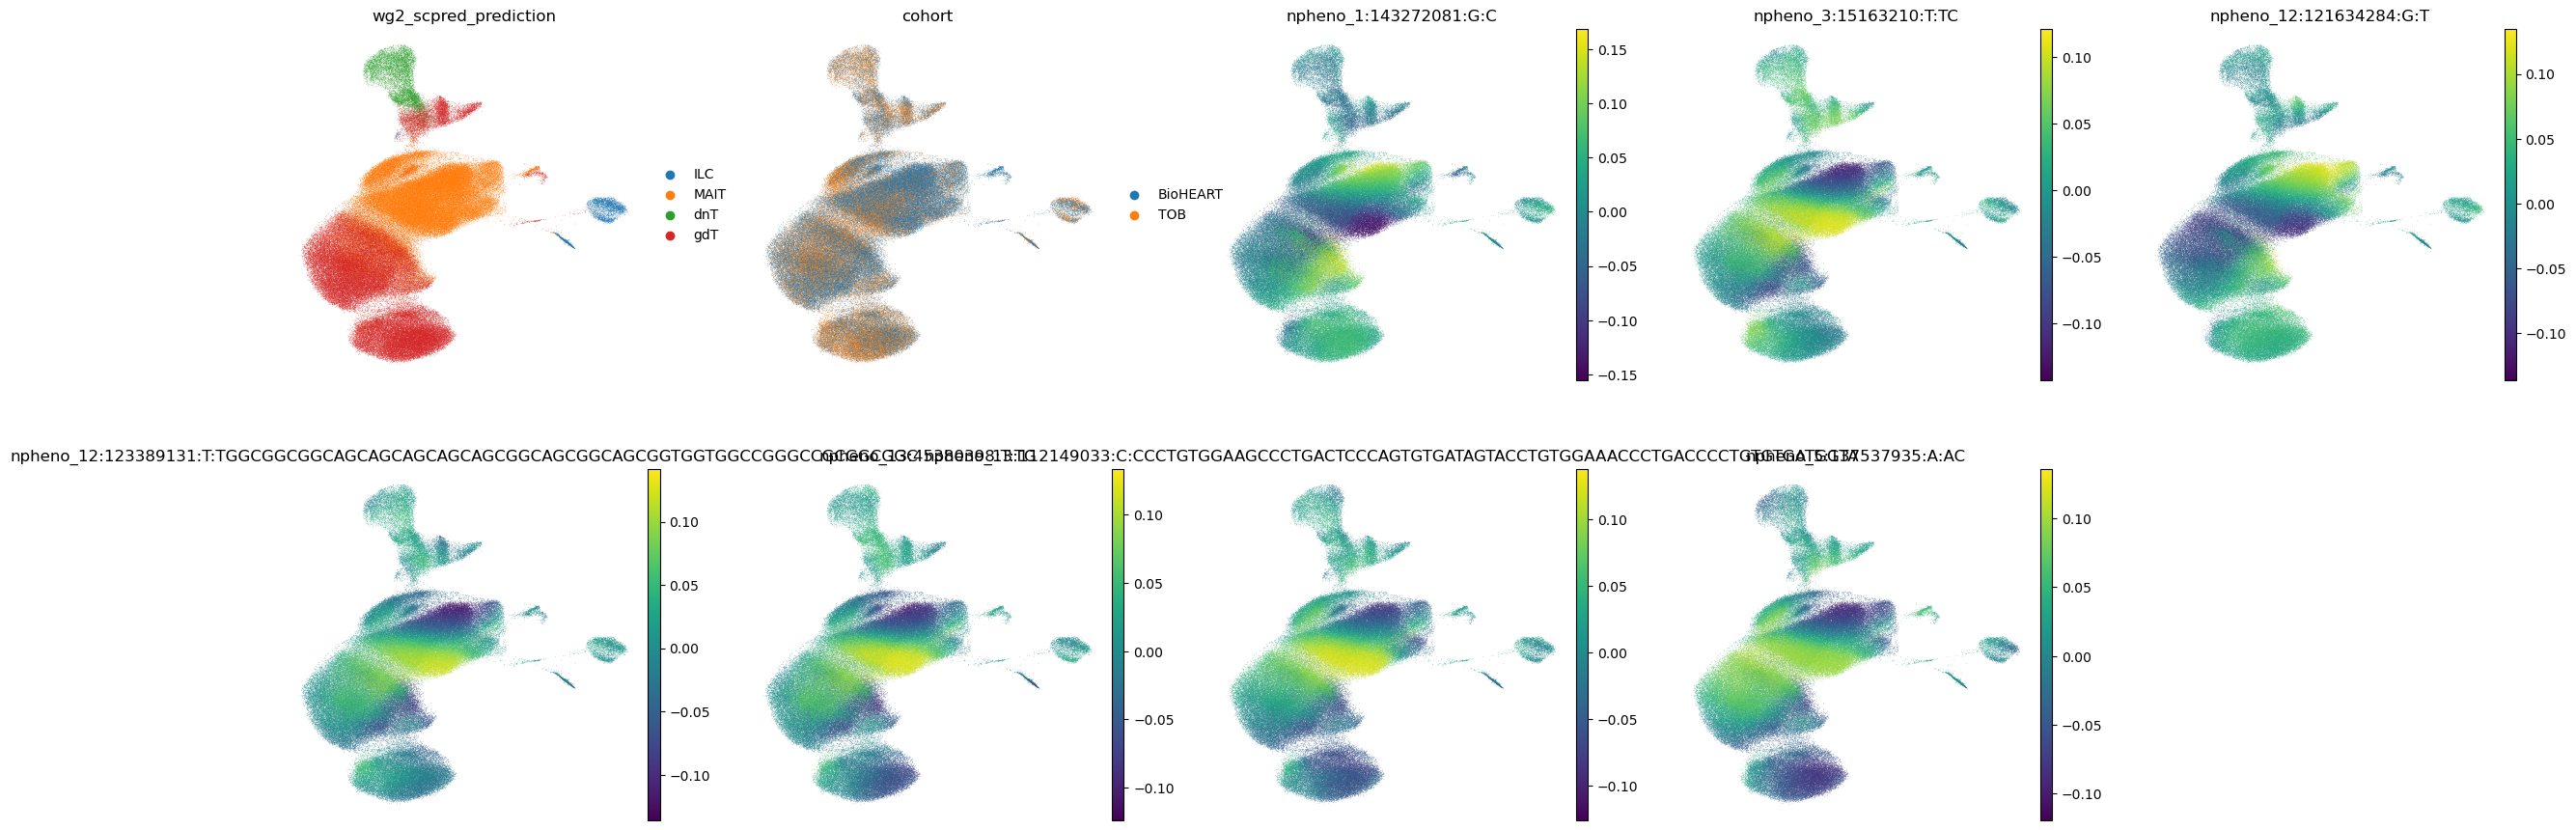

In [7]:
# plot neighbourhood abundance correllations
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        madata,
        color=["wg2_scpred_prediction", "cohort"] + madata.obs.columns[4:].tolist(),
        frameon=False,
        ncols=5,
    )

In [ ]:
variant = "19:16331208:G:A"

sample_pheno = madata.samplem.loc[:,[f"spheno_{variant}", variant]]

# Convert dosage from numeric encoding to actual genotypes
# genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}


def geno_to_letters(ref, alt, geno):
    if geno == 0:
        out = f"{ref}/{ref}"
    elif geno == 1:
        out = f"{ref}/{alt}"
    elif geno == 2:
        out = f"{alt}/{alt}"
    elif geno == -9 or np.isnan(geno):
        out = "Missing genotype"
    else:
        raise ValueError(f"Unexpected genotype value: {geno}")
    return out

ref, alt = variant.split(":")[2:4]

sample_pheno["Genotype"] = [geno_to_letters(ref, alt, g) for g in sample_pheno[variant]]

ct_col = color_pal.loc[
    color_pal["major_cell_type"] == celltype, "color_major_cell_type"
].unique()[0]

vlnplot = (
    ggplot(sample_pheno, aes(x="Genotype", y=f"spheno_{variant}"))
    + geom_violin(color=ct_col, fill=ct_col)
    # + geom_sina()
    + geom_boxplot(fill=None, width=0.1, outlier_shape="")
    + theme_classic()
    + theme(text=element_text(size=20), title=element_text(hjust=0.5))
    + labs(y="Sample-level phenotype", title=variant)
)  
vlnplot.save(
    filename=f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/figures/{resolution}/boxplots/intersections_real_geno/plotnine/{celltype}_{variant}_boxplot.pdf",
    width=5,
    height=5
)

In [ ]:
def csaqtl_boxplot(madata, variant_id_list):

    for variant in variant_id_list:
        variant = "2:111050100:G:A"
        sample_pheno = madata.samplem[[f"npheno_{variant}", variant]]
        sample_pheno.index = madata.uns["NAM_sampleXpc"].index

        # Convert dosage from numeric encoding to actual genotypes
        genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

        def geno_to_letters(ref, alt, geno):
            if geno == 0:
                out = f"{ref}/{ref}"
            elif geno == 1:
                out = f"{ref}/{alt}"
            elif geno == 2:
                out = f"{alt}/{alt}"
            elif geno == -9:
                out = "Missing genotype"
            return out

        ref, alt = genotypes_dict[variant]

        sample_pheno["Genotype"] = [
            geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
        ]

        plot_order = [f"{ref}/{ref}", f"{ref}/{alt}", f"{alt}/{alt}"]

        sns.set_theme(style="darkgrid")
        ax = sns.boxplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            showfliers=False,
            order=plot_order
        )
        ax = sns.swarmplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            color="grey",
            size=1,
            # order=plot_order,
        ).set(title=f"{celltype}, P = {P}, {permuted}")
        # plt.savefig(
        #     fname=f"{figdir}/{resolution}/boxplots/intersections_real_geno/{celltype}_{analysis_name}_{variant}_intersecting_curated_deficiency_genes_box_plot.png",
        #     dpi=300,
        # )
        # plt.clf()
        plt.show()

Here we can see replication of the csaQTL discovered in the onek1k cohort. This is most obvious for 2:111050100:G:A, where the alternate allele is associated with depletion of the NK CD65 bright cells. 

# Exploring csaQTL intersecting Tcell Abundance GWAS

In [ ]:
sc.pl.umap(
    madata, color=["wg2_scpred_prediction", "npheno_19:16331208:G:A"], wspace=0.3
)